# **TIME SERIES ANALYSIS - STORE SALES ANALYSIS AND PREDICTION**
##  **Title**: *"Employing Time Series Analysis to Develop Precise Models for Predicting Store Sales in Corporation Favorita"*

## PROJECT DESCRIPTION

A time series refers to a sequence of data points collected and recorded chronologically over time. It involves the observation of a particular variable or set of variables at regular or irregular intervals. Time series data can be generated from various sources, such as stock prices, weather conditions, population statistics, economic indicators, or sensor readings. In this project, you'll predict store sales on data from Corporation Favorita, a large Ecuadorian-based grocery retailer.

To achieve our goal, we will employ a combination of statistical techniques and machine learning algorithms specifically designed for time series analysis. These methods include classical approaches such as moving averages, exponential smoothing, and autoregressive integrated moving average (ARIMA) models, as well as more advanced techniques like state space models and deep learning-based models such as recurrent neural networks (RNNs).

By leveraging these analytical tools, we aim to make accurate predictions and provide valuable insights into the future behaviour of the time series. The outcomes of this project will not only enhance our understanding of the underlying dynamics of the dataset but also enable us to make informed decisions and formulate effective strategies based on the predicted values.

The project will follow a systematic approach, encompassing data preprocessing, exploratory data analysis, model selection, parameter tuning, and evaluation. Throughout the process, we will adhere to the industry-standard methodology, the CRISP-DM framework, to ensure a structured and reliable analysis.

By the end of this project, we anticipate obtaining robust and reliable forecasting models that can be applied to future time periods, enabling us to make data-driven decisions, optimize resource allocation, and achieve improved performance in the relevant domain.


HYPOTHESIS 

- **H0**: Promotional activities does not have a significant impact on the store sales at Corporation Favorita.


- **H1**: Promotional activities have a significant impact on the store sales at Corporation Favorita.


### Analytical Questions

1. Which Store has the highest Sales?
2. Which Product is the Most Bought Product?
3. Which Month had the highest sales?
4. Total transaction made By Store?
5. Which year had the highest transactions made?
6. How does oil affect transactions?

### INSTALLING LIBRARIES

In [81]:
#%pip install matplotlib
#%pip install python-dotenv

### IMPORTING PACKAGES

In [82]:
#Data handling 
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 100)

#Data Visulisation
import matplotlib.pyplot as plt 
import plotly.express as ex
import matplotlib as mpl
import matplotlib.dates as mdates
import seaborn as sns
from dotenv import dotenv_values 

from datetime import datetime
from datetime import date
import warnings

import pyodbc
warnings.filterwarnings('ignore') 

## LOADING DATASET

In [83]:
#load environment values 
env_var = dotenv_values('.env')

#Get the values for the credentials you set in the '.env' file
database= env_var.get("DATABASE")
server=env_var.get("SERVER")
username =env_var.get("USERNAME")
password=env_var.get("PASSWORD")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [84]:
connection=pyodbc.connect(connection_string)

In [85]:
#harmonising the date format "%Y-%m-%d"
def convert_to_date(w):
    return datetime.strptime(w,"%Y-%m-%d")

#Data from Server
#Table 1
query1="Select * from dbo.oil"
oil=pd.read_sql(query1,connection,parse_dates= ["date"]) #, date_parser= convert_to_date)
#Table 2
query2="Select * from dbo.holidays_events"
holidays=pd.read_sql(query2,connection,parse_dates= ["date"])#, date_parser= convert_to_date)
#Table 3
query3="Select * from dbo.stores"
stores=pd.read_sql(query3,connection)

#From onedrive
test = pd.read_csv('test.csv',parse_dates= ["date"], date_parser= convert_to_date)
sample_submission = pd.read_csv('sample_submission.csv')

#from github repo
train = pd.read_csv('train.csv',parse_dates= ["date"], date_parser= convert_to_date)
transactions = pd.read_csv('transactions.csv',parse_dates= ["date"], date_parser= convert_to_date)



## DATA OVERVIEW

we were provided with 7 datasets which we shall be analysing namely 
- Transactions
- Train 
- Test
- Sample submission
- Stores
- Holiday
- Oil

First and foremost we would like to check their shapes to see if they have equal Columns 

In [86]:
#Check the shape of our Datasets
datasets= {'train' : train,'test' : test, 'transactions' : transactions, 'oil' : oil, 'holidays' : holidays, 'stores' : stores}

for df , data in datasets.items():
    print(f'Shape of {df} dataframe :', data.shape, "\n")

Shape of train dataframe : (3000888, 6) 

Shape of test dataframe : (28512, 5) 

Shape of transactions dataframe : (83488, 3) 

Shape of oil dataframe : (1218, 2) 

Shape of holidays dataframe : (350, 6) 

Shape of stores dataframe : (54, 5) 



**Remark** : Since the datasets do not have the same shapes we would like to eplore them all seperately 

#### Check for Summaries, Null Values, Info

In [87]:
#Check the ".info()" of our Datasets
for df , data in datasets.items():
    print(f'Summary of "{df}" dataframe :')
    print("_"*40)
    print(data.info(),"\n\n")

Summary of "train" dataframe :
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
None 


Summary of "test" dataframe :
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  obj

__Remark__
: We can see we do not have any wrong Datatypes assigned 

In [88]:
#Check the ".describe()" of our Datasets
for df , data in datasets.items():
    print(f'Statistical Summary of "{df}" dataframe :')
    print("_"*60)
    print(data.describe(),"\n\n")

Statistical Summary of "train" dataframe :
____________________________________________________________


                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02 


Statistical Summary of "test" dataframe :
____________________________________________________________
                 id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000


In [89]:
#Check the "number null values" of our Datasets
for df , data in datasets.items():
    print(f'Number of Null Values in "{df}" dataframe :')
    print("_"*40)
    print(data.isna().sum(),"\n\n")

Number of Null Values in "train" dataframe :
________________________________________
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64 


Number of Null Values in "test" dataframe :
________________________________________
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64 


Number of Null Values in "transactions" dataframe :
________________________________________
date            0
store_nbr       0
transactions    0
dtype: int64 


Number of Null Values in "oil" dataframe :
________________________________________
date           0
dcoilwtico    43
dtype: int64 


Number of Null Values in "holidays" dataframe :
________________________________________
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64 


Number of Null Values in "stores" dataframe :
________________________________________
store_nbr    0
city

__Remark__
: we can observe that only the oil Dataframe has null values, after our EDA we can now find a right way to handle it

### EXPLORATORY DATA ANALYSIS

Strategy: we shall analyse the datasets individually in order to come up with some interesting findings 

__OIL__

In [90]:
oil.head()

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02   93.139999
2 2013-01-03   92.970001
3 2013-01-04   93.120003
4 2013-01-07   93.199997

since oil has just one column we will quickly plot a line graph to check for trends and seasonalities 

In [91]:
#Create copy to work on 
df_oil = oil.copy().set_index('date')
df_oil.head()

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02   93.139999
2013-01-03   92.970001
2013-01-04   93.120003
2013-01-07   93.199997

<AxesSubplot:xlabel='date'>

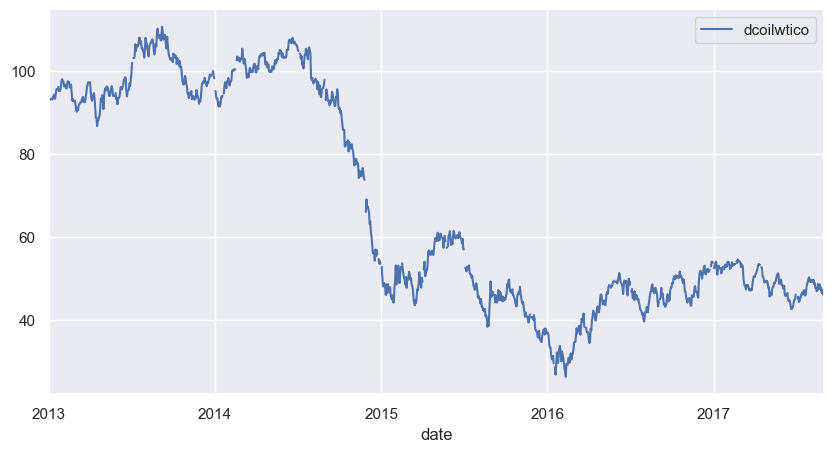

In [92]:

df_oil.plot()

**Remark** : We can observe here that there is a downward trend in the price of oil, it fell 2015 down to 2016 and then sarted gaining in 2017

In [93]:
#Since we see a trend in the data and also we realised that the first value is also missing we would then use a backwardfill to tackle our missing values 
df_oil["dcoilwtico"]= df_oil["dcoilwtico"].fillna(method= "bfill")
df_oil.isna().sum()

dcoilwtico    0
dtype: int64

__HOLIDAY__

In [94]:
holidays.head()

date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [95]:
holidays.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [96]:
#Copy to work on 
df_holi = holidays.copy()


In [97]:
##Let's use a bubble plot to visualize the most prominent 
##We are trying to group the holidays based on count. And we are creating a column known as count. 
typ_cnts = df_holi.groupby('type').size().reset_index(name="count")
typ_cnts

type  count
0  Additional     51
1      Bridge      5
2       Event     56
3     Holiday    221
4    Transfer     12
5    Work Day      5

In [98]:
fig = ex.scatter(typ_cnts, x='type', y='count', size='count', color= "type", hover_name='type',
                 log_y=False, size_max=60)
fig.show()

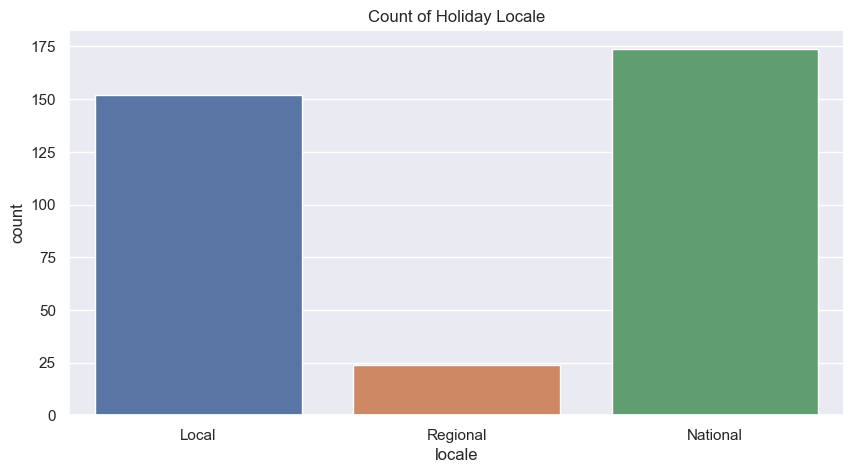

In [99]:
#Creating a count of the Holiday Locale 
plt.title("Count of Holiday Locale")
sns.countplot("locale", data= df_holi)
plt.show()

In [100]:
#checking for the total number of Holidys that were transfered
trans_count= df_holi.groupby("transferred").size().reset_index(name="count")
trans_count

transferred  count
0        False    338
1         True     12

([<matplotlib.patches.Wedge at 0x211afc2fbe0>,
 [Text(-1.0936251618386073, 0.11825398679740307, 'False'),
  Text(1.0936251576867049, -0.11825402519461974, 'True')],
 [Text(-0.5965228155483311, 0.0645021746167653, '97%'),
  Text(0.5965228132836572, -0.06450219556070166, '3%')])

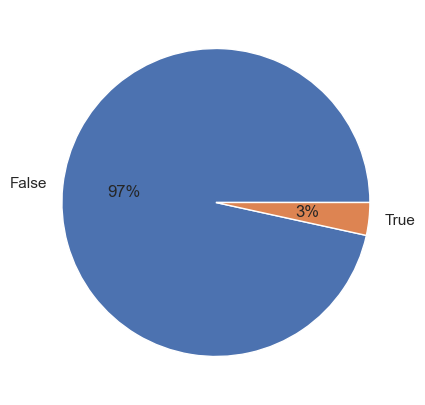

In [101]:
#palette_color = sns.color_palette('bright')
plt.pie(data= trans_count, x= "count", labels= "transferred", autopct='%.0f%%' )

**Remark** : 
1. there are more national holidays as compared to the other ones 
2. We had 2 Holidays days being trasnfered, constituting just 3%

__STORES__

In [102]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [103]:
df_store = stores.copy()

In [104]:
df_store.describe().T

count       mean        std  min    25%   50%    75%   max
store_nbr   54.0  27.500000  15.732133  1.0  14.25  27.5  40.75  54.0
cluster     54.0   8.481481   4.693395  1.0   4.00   8.5  13.00  17.0

In [105]:
clus_cnt= df_store.groupby("cluster").size().reset_index(name="count")
clus_cnt.T

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
cluster   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
count     3   2   7   3   1   6   2   3   2   6   3   1   4   4   5   1   1

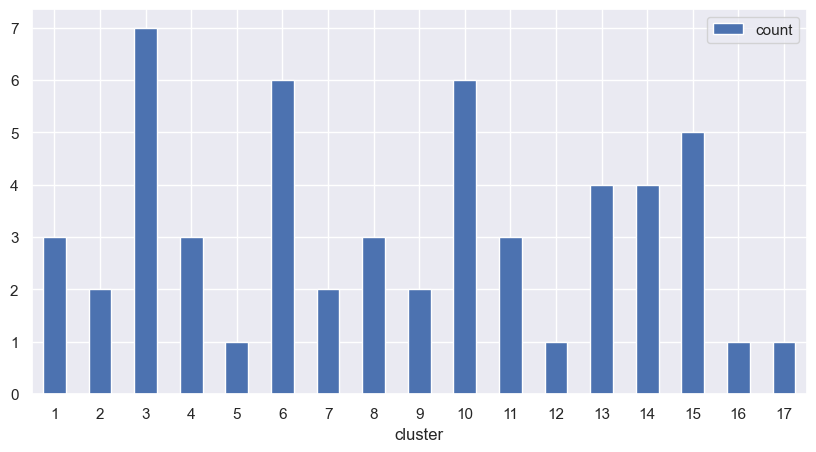

In [106]:
ax = clus_cnt.plot.bar(x='cluster', y='count', rot=0)

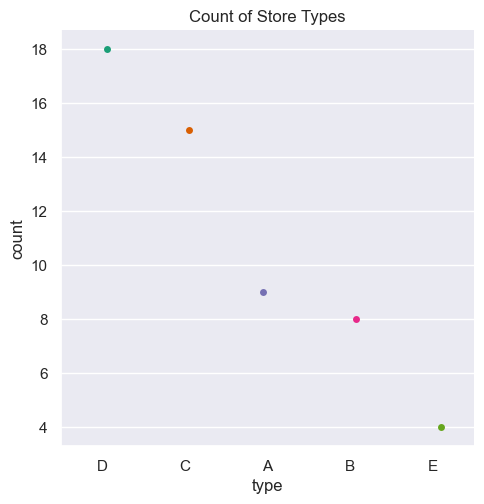

In [107]:
type_count= stores.type.value_counts().reset_index()

type_count.columns= ["type", "count"]

sns.set(rc={"figure.figsize": (10,5)})
sns.catplot("type", data=type_count, y= "count", palette= "Dark2")

plt.title("Count of Store Types")


##store type D has the highest count

plt.show()

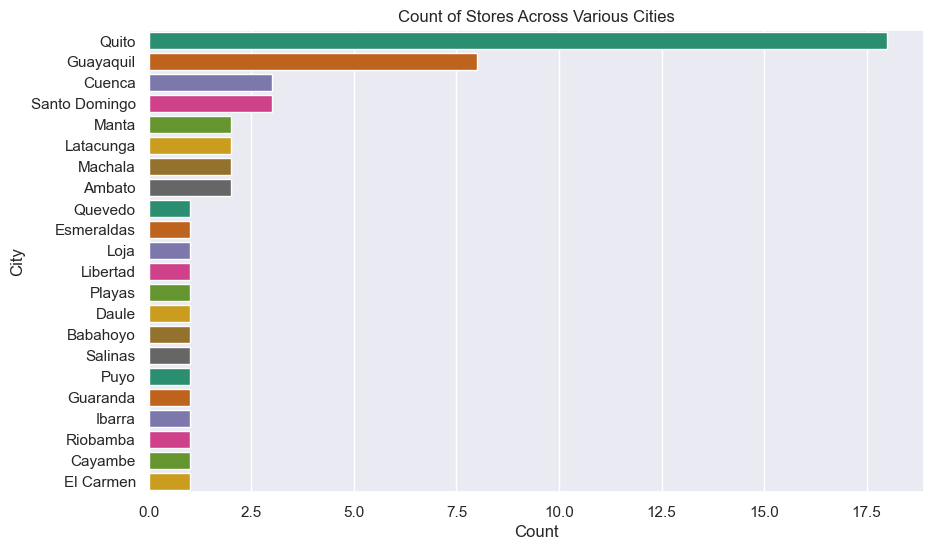

In [108]:
city_count = stores.city.value_counts().reset_index()
city_count.columns = ["city", "count"]


plt.figure(figsize=(10, 6))
sns.barplot(data=city_count, y="city", x="count", palette="Dark2")
plt.title("Count of Stores Across Various Cities")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()


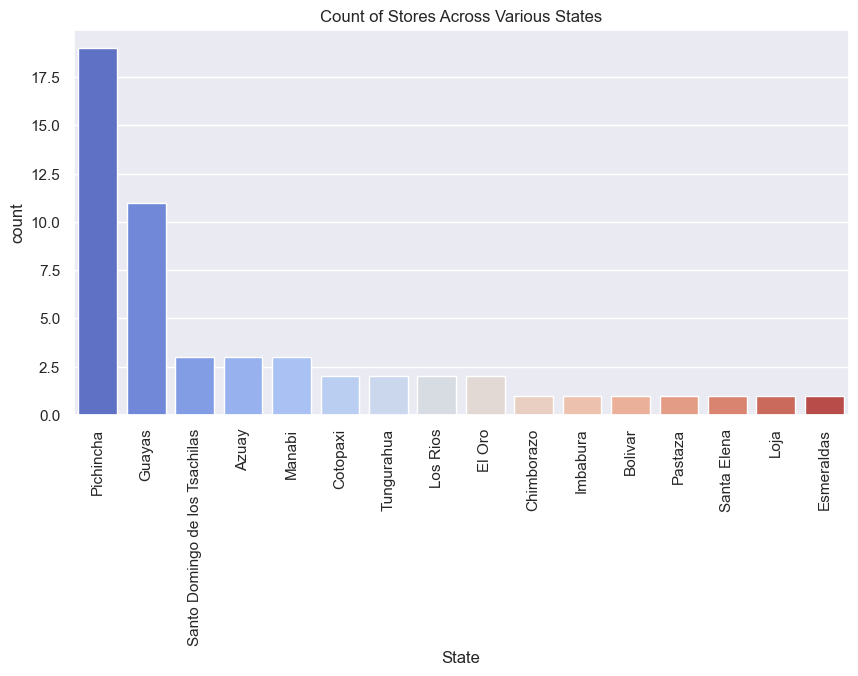

<Figure size 2000x1500 with 0 Axes>

In [109]:
## Checking to see the occurence of each store across Ecaudor
state_count= stores.state.value_counts().reset_index()

state_count.columns= ["State", "count"]

sns.barplot("State", data=state_count, y= "count", palette= "coolwarm")

plt.title("Count of Stores Across Various States")
plt.xticks(rotation=90)
plt.figure(figsize= (20,15))

plt.show()

In [110]:
#Checking unique Stores 
print("There are:", len(stores.store_nbr.unique()), "Unique Stores")

There are: 54 Unique Stores


__Remarks__ 
- The 54 unique stores across the states
- There are 22 cities and 16 states
- Quito and Pichincha has the highest count of stores.
- There are 5 unique types of Stores.
- There also 17 unique clusters

__TRANSACTION__

In [111]:
transactions.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [112]:
df_trans = transactions.copy().set_index("date")
df_trans.head()

store_nbr  transactions
date                               
2013-01-01         25           770
2013-01-02          1          2111
2013-01-02          2          2358
2013-01-02          3          3487
2013-01-02          4          1922

In [113]:
fig = ex.line(x= df_trans.index, y = "transactions", data_frame = df_trans)

fig.update_xaxes(rangeslider_visible = True)

fig.show()

__Remarks__ we can see some spikes whhich signifies seasonality at the begining of every year.

### Check for Outliers

<AxesSubplot:>

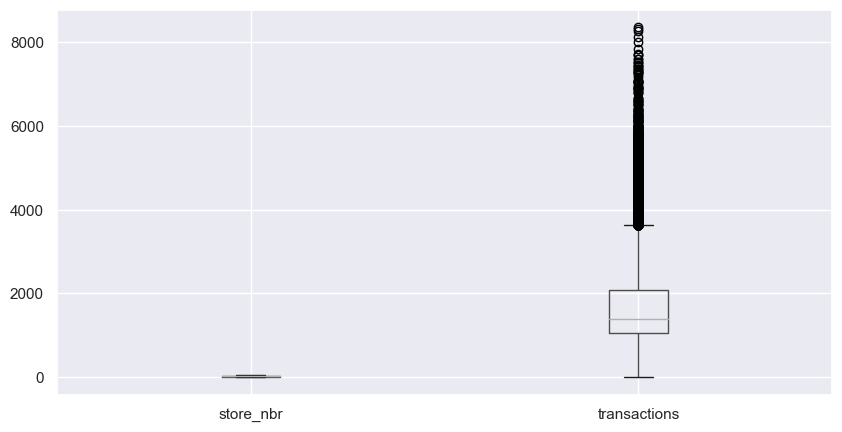

In [114]:
transactions.boxplot()

 During the analysis, the median will be used when plotting the resampled values since there are outliers

## Transaction Data Resampling

In [115]:
monthly_trans= df_trans.drop(labels= "store_nbr",axis= 1).resample("M").median()
monthly_trans.head()

transactions
date                    
2013-01-31        1386.0
2013-02-28        1403.5
2013-03-31        1424.0
2013-04-30        1423.5
2013-05-31        1424.0

Text(0.5, 1.0, ' Monthly Average Transactions')

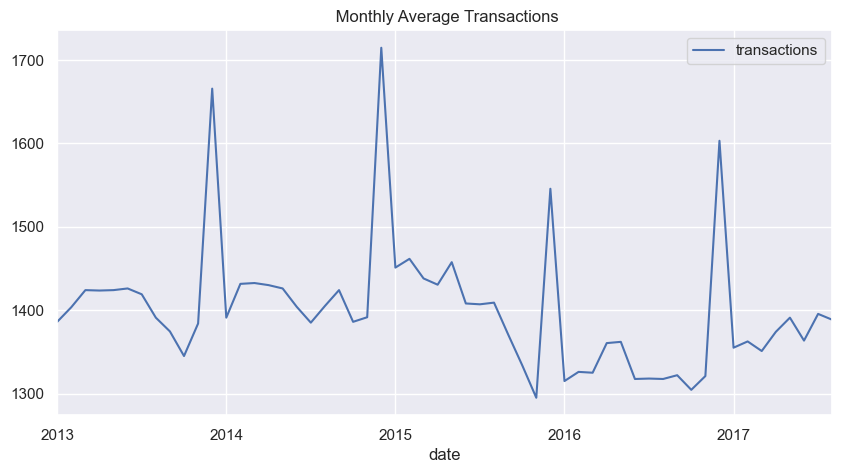

In [116]:
monthly_trans.plot()
plt.title(" Monthly Average Transactions")

### Remarks
From the plot, there is a sharp rise in transactions every December indicating some form of seasonality.
 Also, getting to the middle of each year, there is a rise in transactions made

__TEST__

In [117]:
test.head()

id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

this is our test data and we would not to dole 

### TRAIN

In [118]:
train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [119]:
df_train = train.copy().set_index("date")

In [120]:
df_train

id  store_nbr                      family     sales  \
date                                                                   
2013-01-01        0          1                  AUTOMOTIVE     0.000   
2013-01-01        1          1                   BABY CARE     0.000   
2013-01-01        2          1                      BEAUTY     0.000   
2013-01-01        3          1                   BEVERAGES     0.000   
2013-01-01        4          1                       BOOKS     0.000   
...             ...        ...                         ...       ...   
2017-08-15  3000883          9                     POULTRY   438.133   
2017-08-15  3000884          9              PREPARED FOODS   154.553   
2017-08-15  3000885          9                     PRODUCE  2419.729   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2017-08-15  3000887          9                     SEAFOOD    16.000   

            onpromotion  
date                     
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
...                 ...  
2017-08-15            0  
2017-08-15            1  
2017-08-15          148  
2017-08-15            8  
2017-08-15            0  

[3000888 rows x 5 columns]

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'store_nbr'}>],
       [<AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'onpromotion'}>]], dtype=object)

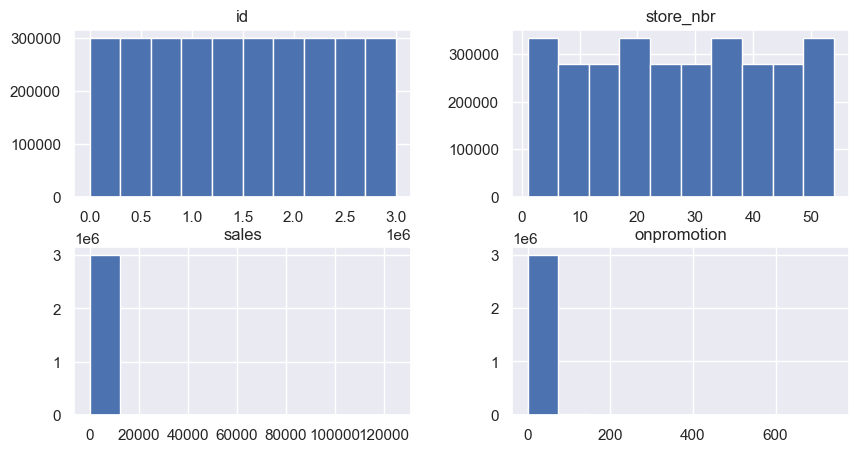

In [121]:
df_train.hist()


<AxesSubplot:>

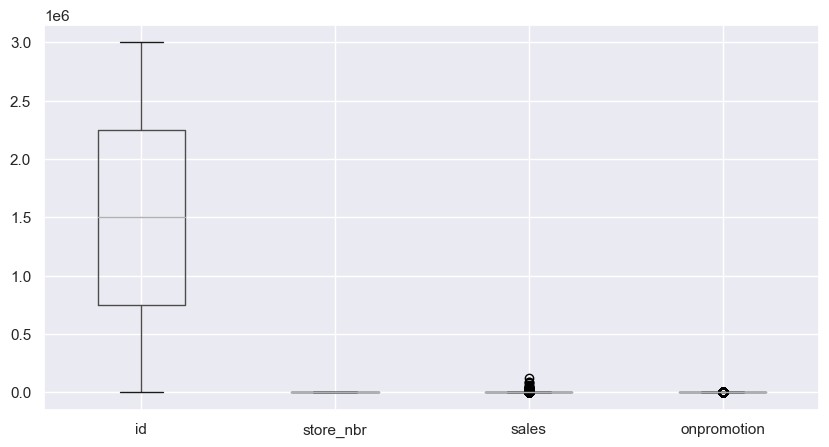

In [122]:
#check for outliers
df_train.boxplot()

There are outliers on the sale column

__SALES ATTRIBUTE__

Text(0.5, 1.0, 'Sales with respect to Time')

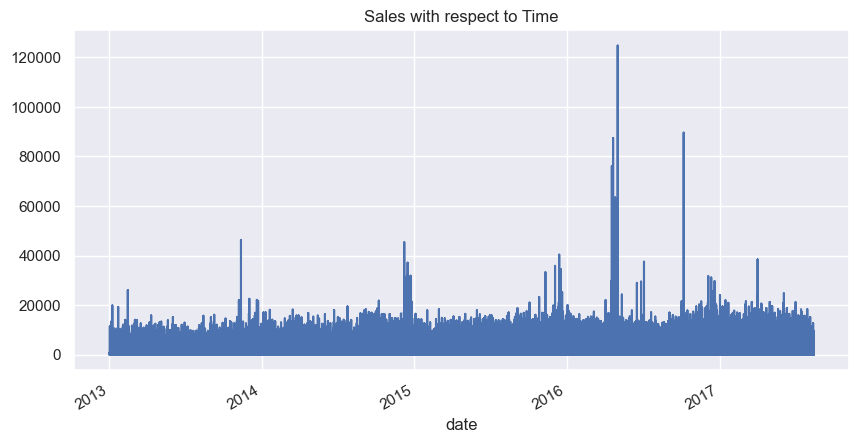

In [123]:
df_train.sales.plot()
plt.title("Sales with respect to Time")

_Daily Sales Resampling_

<AxesSubplot:title={'center':'Daily Sales for Corporation  Favorita'}, xlabel='date'>

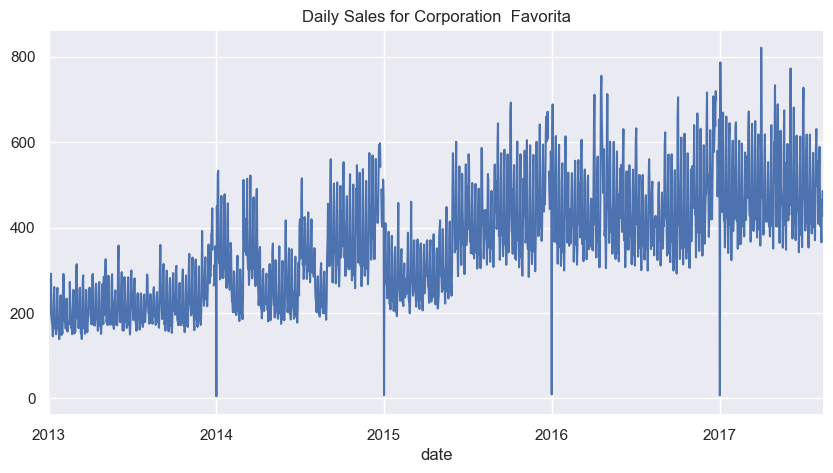

In [124]:

Daily_Sales= df_train["sales"].resample("D").mean()

plt.title("Daily Sales for Corporation  Favorita")

Daily_Sales.plot()

__Remark__:
Generally, there is an upward trend in the daily sales

 __Weekly sales Resampling__

<AxesSubplot:title={'center':'Weekly Sales for Corporation Favorita'}, xlabel='date'>

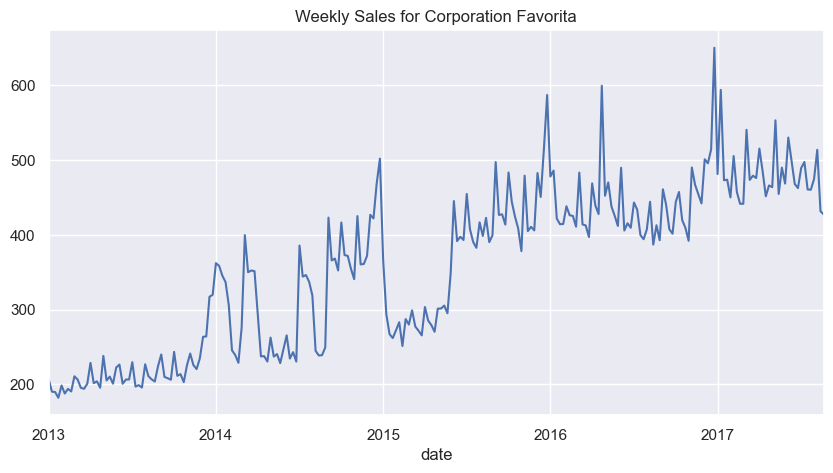

In [125]:
weekly_sales= df_train["sales"].resample("W").mean()

plt.title("Weekly Sales for Corporation Favorita")

weekly_sales.plot()

__.__ There is a trend in  the weekly sales

<AxesSubplot:title={'center':'Monthly Sales for Corporation Favorita'}, xlabel='date'>

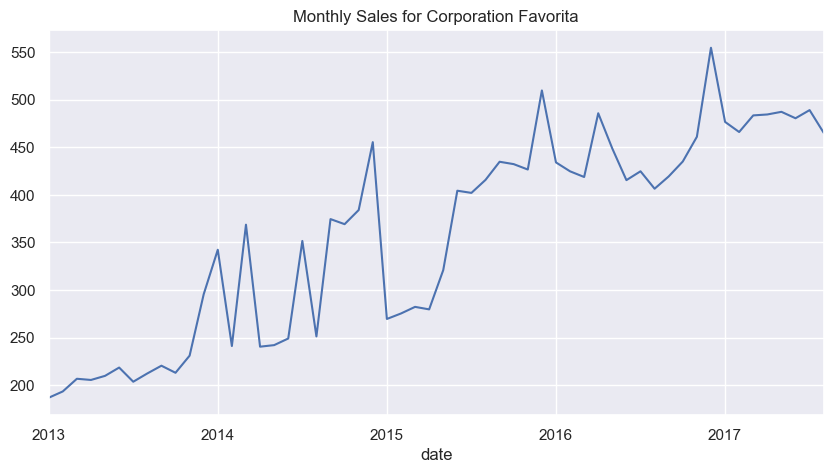

In [126]:
Monthly_sales= df_train["sales"].resample("M").mean()

plt.title("Monthly Sales for Corporation Favorita")

Monthly_sales.plot()

__.__ There is a trend in the monthly sales

Since this is our training data we will just proceed to merge them 


In [127]:
sample_submission.head()

id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0

In [128]:
merged_1 = pd.merge(train, transactions, how='outer', on=['date', 'store_nbr'])

merged_2 = pd.merge(merged_1, holidays, how='outer', on='date')

merged_3 = pd.merge(merged_2, oil, how='outer', on='date')

merged = pd.merge(merged_3, stores, how='outer', on='store_nbr')

In [129]:
merged.head()

id       date  store_nbr      family  sales  onpromotion  transactions  \
0  0.0 2013-01-01        1.0  AUTOMOTIVE    0.0          0.0           NaN   
1  1.0 2013-01-01        1.0   BABY CARE    0.0          0.0           NaN   
2  2.0 2013-01-01        1.0      BEAUTY    0.0          0.0           NaN   
3  3.0 2013-01-01        1.0   BEVERAGES    0.0          0.0           NaN   
4  4.0 2013-01-01        1.0       BOOKS    0.0          0.0           NaN   

    type_x    locale locale_name         description transferred  dcoilwtico  \
0  Holiday  National     Ecuador  Primer dia del ano       False         NaN   
1  Holiday  National     Ecuador  Primer dia del ano       False         NaN   
2  Holiday  National     Ecuador  Primer dia del ano       False         NaN   
3  Holiday  National     Ecuador  Primer dia del ano       False         NaN   
4  Holiday  National     Ecuador  Primer dia del ano       False         NaN   

    city      state type_y  cluster  
0  Quito  Pichincha      D     13.0  
1  Quito  Pichincha      D     13.0  
2  Quito  Pichincha      D     13.0  
3  Quito  Pichincha      D     13.0  
4  Quito  Pichincha      D     13.0

__Remark__
: it was oberved that the has been some new column names created, type_x and type_y

In [130]:
#Rename column name type x and type y 
merged = merged.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

merged.head()

id       date  store_nbr      family  sales  onpromotion  transactions  \
0  0.0 2013-01-01        1.0  AUTOMOTIVE    0.0          0.0           NaN   
1  1.0 2013-01-01        1.0   BABY CARE    0.0          0.0           NaN   
2  2.0 2013-01-01        1.0      BEAUTY    0.0          0.0           NaN   
3  3.0 2013-01-01        1.0   BEVERAGES    0.0          0.0           NaN   
4  4.0 2013-01-01        1.0       BOOKS    0.0          0.0           NaN   

  holiday_type    locale locale_name         description transferred  \
0      Holiday  National     Ecuador  Primer dia del ano       False   
1      Holiday  National     Ecuador  Primer dia del ano       False   
2      Holiday  National     Ecuador  Primer dia del ano       False   
3      Holiday  National     Ecuador  Primer dia del ano       False   
4      Holiday  National     Ecuador  Primer dia del ano       False   

   dcoilwtico   city      state store_type  cluster  
0         NaN  Quito  Pichincha          D     13.0  
1         NaN  Quito  Pichincha          D     13.0  
2         NaN  Quito  Pichincha          D     13.0  
3         NaN  Quito  Pichincha          D     13.0  
4         NaN  Quito  Pichincha          D     13.0

Now we will perform a overview on our dataset

__MULTIVARIATE ANALYSIS__

In [131]:
corr = df_train.corr()
corr

id  store_nbr     sales  onpromotion
id           1.000000   0.000301  0.085784     0.206260
store_nbr    0.000301   1.000000  0.041196     0.007286
sales        0.085784   0.041196  1.000000     0.427923
onpromotion  0.206260   0.007286  0.427923     1.000000

<AxesSubplot:>

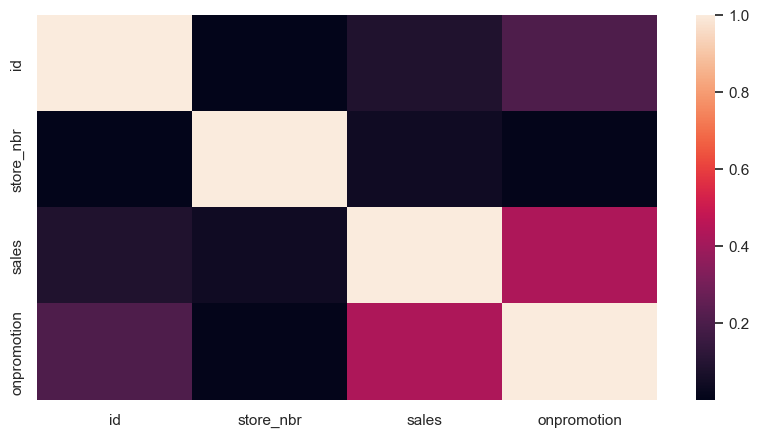

In [132]:
#visualize correlation

sns.heatmap(corr)

### ANSWERING ANALYTICAL QUESTIONS

1. Which Store has the highest Sales?
2. Which Product is the Most Bought Product?
3. Which Month had the highest sales?
4. Total transaction made By Store?
5. Which year had the highest transactions made?
6. How does oil affect transactions?

### Q1.Which store had the highest sales?

Text(0.5, 1.0, 'Top 5 Store with the Highest Sale')

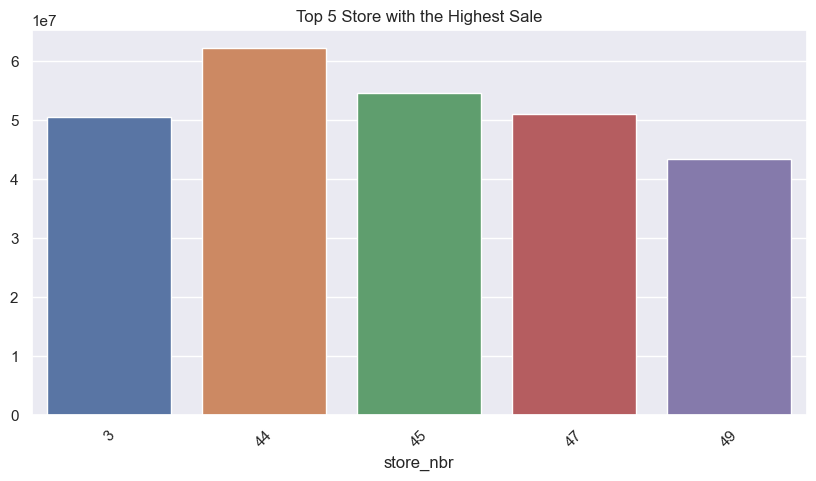

In [133]:
sto_sale= df_train.groupby("store_nbr")["sales"].agg("sum").sort_values(ascending= False).head()

sns.barplot(x=sto_sale.index, y=sto_sale.values)


plt.xticks(rotation= 45)
plt.title('Top 5 Store with the Highest Sale')

In [134]:
family_bought= df_train[df_train["sales"]!=0 ]

##Lets group and plot

family_sale = family_bought.groupby('family').size().reset_index(name='count').sort_values(by= "count")


fig_2= ex.scatter(family_sale, x='family', y='count', size='count', color= "family", hover_name='family',
                log_y=False, size_max=60)

fig_2.show()

### Q3.Which month had the highest sale?

In [135]:
train_df = train

In [136]:
##to find this, we will group our unit sales by month across all the years
train_df["month"]= train_df["date"].dt.month
train_df["day"]= train_df["date"].dt.day
train_df["year"]= train_df["date"].dt.year

In [137]:
train_df

id       date  store_nbr                      family     sales  \
0              0 2013-01-01          1                  AUTOMOTIVE     0.000   
1              1 2013-01-01          1                   BABY CARE     0.000   
2              2 2013-01-01          1                      BEAUTY     0.000   
3              3 2013-01-01          1                   BEVERAGES     0.000   
4              4 2013-01-01          1                       BOOKS     0.000   
...          ...        ...        ...                         ...       ...   
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  month  day  year  
0                  0      1    1  2013  
1                  0      1    1  2013  
2                  0      1    1  2013  
3                  0      1    1  2013  
4                  0      1    1  2013  
...              ...    ...  ...   ...  
3000883            0      8   15  2017  
3000884            1      8   15  2017  
3000885          148      8   15  2017  
3000886            8      8   15  2017  
3000887            0      8   15  2017  

[3000888 rows x 9 columns]

<AxesSubplot:xlabel='month', ylabel='sales'>

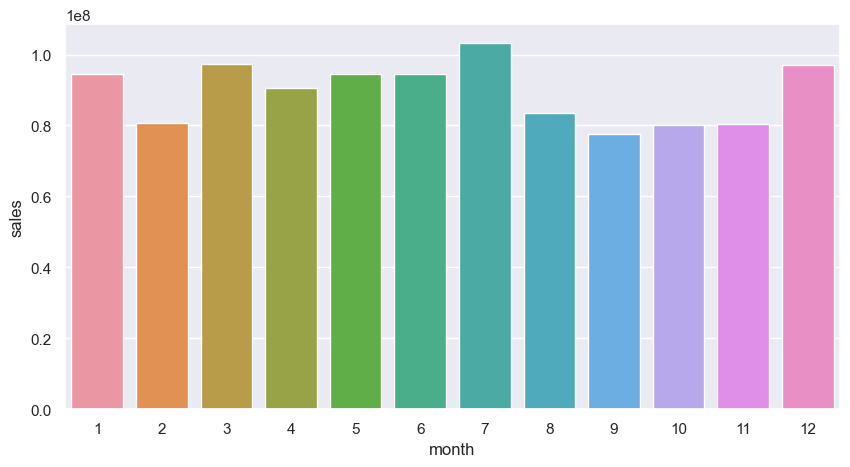

In [138]:
# the sales by month
monthly_sales = train_df.groupby("month").agg({"sales":"sum"}).sort_values(by="sales")

#visualising
sns.barplot(data = monthly_sales, x= monthly_sales.index, y= "sales" )

### Q4. Which Store had the highest transaction?

Text(0.5, 1.0, 'Top 5 Store with the Highest Transactions')

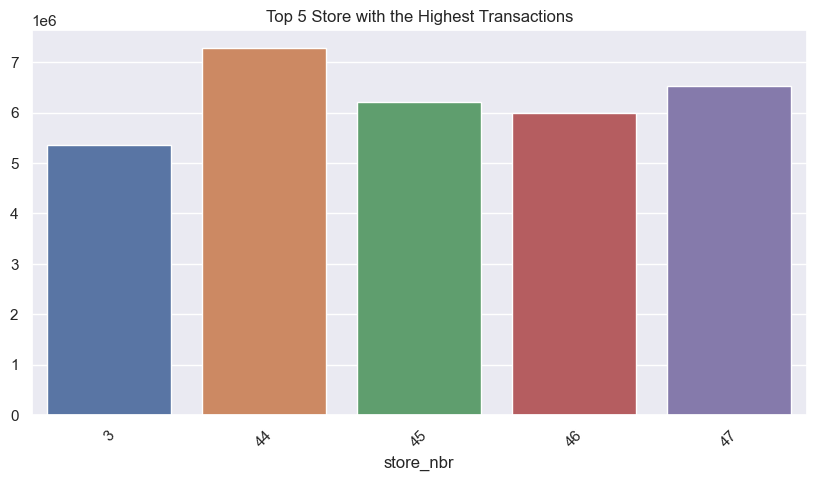

In [139]:
sto_tran = transactions.groupby("store_nbr")["transactions"].agg("sum").sort_values(ascending= False).head()

sns.barplot(x=sto_tran.index, y=sto_tran.values)

plt.xticks(rotation= 45)
plt.title('Top 5 Store with the Highest Transactions')

### Q5 Which year had the highest Transaction made?

<AxesSubplot:ylabel='sales'>

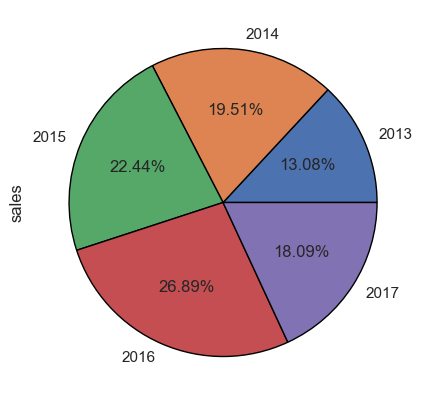

In [140]:
yearly_sales = train_df.groupby("year")["sales"].sum().plot(kind="pie", y="sales", autopct = '%1.2f%%', wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
yearly_sales

__MODELLING__